In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
reg_model = linear_model.LinearRegression()

In [5]:
grnd_temp = df[['Ground Temperature']]
grnd_temp.head(3)

,Ground Temperature
0,88.6
1,71.6
2,93.3


In [6]:
chirps_sec = df['Chirps/Second']
chirps_sec.head(3)

0    20.0
1    16.0
2    19.8
Name: Chirps/Second, dtype: float64

In [7]:
reg_model.fit(grnd_temp,chirps_sec)

LinearRegression()

In [8]:
reg_model.coef_

array([0.20299973])

In [9]:
reg_model.intercept_

0.4593146452359598

### 1. Find the linear regression equation for this data.

In [10]:
print(f'Linear Regression Equation: y = {reg_model.coef_[0]:.4f} * x + {reg_model.intercept_:.4f}')

Linear Regression Equation: y = 0.2030 * x + 0.4593


### 2. Chart the original data and the equation on the chart.

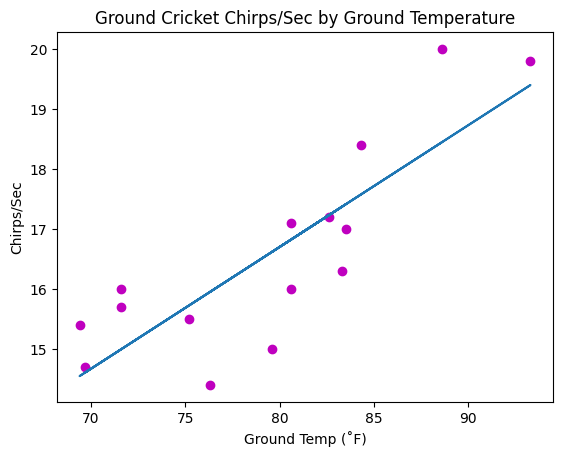

In [11]:
plt.scatter(grnd_temp, chirps_sec, color='m')
plt.plot(grnd_temp, reg_model.predict(grnd_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

### 3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [12]:
r_sq = reg_model.score(grnd_temp, chirps_sec)
print(f'R^2 score for this equation: {r_sq:.4f} ')
if r_sq > 0.8000:
  print('According to R-Squared value, this model is a good fit for the data')
else:
  print('According to R-Squared value, this model is not a good fit for the data')

R^2 score for this equation: 0.6923 
According to R-Squared value, this model is not a good fit for the data


### 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?


In [40]:
x = 95
chirps_data = reg_model.coef_[0] * x + reg_model.intercept_
print(f'If the ground temperature reached 95, then crickets would be chirping at {chirps_data:.4f} Chirps/second ')

If the ground temperature reached 95, then crickets would be chirping at 19.7443 Chirps/second 


### 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?


In [14]:
temp_data = (18 - reg_model.intercept_) / reg_model.coef_[0]
print(f'The approximate ground temperature on a particular morning would be {temp_data:.2f}˚F')


The approximate ground temperature on a particular morning would be 86.41˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
df = pd.read_fwf("brain_body.txt")

In [23]:
reg_model_bb = linear_model.LinearRegression()

In [26]:
brain_wt = df[['Brain']]
brain_wt.head(3)

,Brain
0,3.385
1,0.480
2,1.350


In [25]:
body_wt = df['Body']
body_wt.head(3)

0    44.5
1    15.5
2     8.1
Name: Body, dtype: float64

In [27]:
reg_model_bb.fit(brain_wt,body_wt)

LinearRegression()

In [28]:
reg_model_bb.coef_[0]

0.9664963676725762

In [29]:
reg_model_bb.intercept_

91.00439620740681

### 1. Find the linear regression equation for this data for brain weight to body weight.

In [33]:
print(f'The linear regression equation for this data for brain weight to body weighth is : eqn_bb = {reg_model.coef_[0]:.4f} * x + {reg_model.intercept_:.4f} ')

The linear regression equation for this data for brain weight to body weighth is : eqn_bb = 0.2030 * x + 0.4593 


### 2. Chart the original data and the equation on the chart.

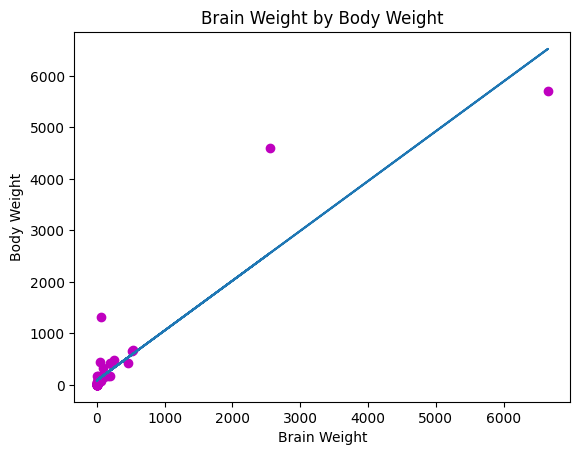

In [43]:
plt.scatter(brain_wt, body_wt, color='m')
plt.plot(brain_wt, reg_model_bb.predict(brain_wt))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [45]:
r_sq_bb = reg_model_bb.score(brain_wt, body_wt)
r_sq_bb

0.8726620843043331

### 3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data.

In [46]:
print(f'R^2 score for this equation: {r_sq_bb:.4f} ')
if r_sq_bb > 0.8000:
  print('According to R-Squared value, this model is a good fit for the data')
else:
  print('According to R-Squared value, this model is not a good fit for the data')

R^2 score for this equation: 0.8727 
According to R-Squared value, this model is a good fit for the data


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [4]:
df.shape

(52, 6)

In [6]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [9]:
X = df.iloc[ : , :5]
X.head(3)

,Sex,Rank,Year,Degree,YSdeg
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23


In [10]:
y = df['Salary']
y.head(3)

0    36350
1    35350
2    28200
Name: Salary, dtype: int64

In [11]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
model.coef_

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [13]:
model.intercept_

11410.146547255623

1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [16]:
print(f'The linear regression equation for this data for Sex, Rank, Year, Degree, YSdeg to Salary is : \
        eqn_sd = {model.coef_[0]:.4f} * x + {model.intercept_:.4f} ')

The linear regression equation for this data for Sex, Rank, Year, Degree, YSdeg to Salary is :         eqn_sd = 1241.7925 * x + 11410.1465 
